In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [2]:
os.listdir('Price_csv')[3].split('_')[3]

'CHCL'

In [3]:
os.listdir('Price_csv')

['nepsealpha_export_price_CBBL_2020-04-01_2025-03-26.csv',
 'nepsealpha_export_price_SANIMA_2020-04-01_2025-03-26.csv',
 '.DS_Store',
 'nepsealpha_export_price_CHCL_2020-04-01_2025-03-26.csv',
 'nepsealpha_export_price_GBBL_2020-04-01_2025-03-26.csv',
 'nepsealpha_export_price_SHL_2020-04-01_2025-03-26.csv',
 'nepsealpha_export_price_SHIVM_2020-04-01_2025-03-26.csv',
 'nepsealpha_export_price_SICL_2020-04-01_2025-03-26.csv']

In [4]:
stocks = []

In [5]:
for file in os.listdir('Price_csv'):
    if file == '.DS_Store':
        continue
    print(file.split('_')[3])
    stocks.append(file.split('_')[3])

CBBL
SANIMA
CHCL
GBBL
SHL
SHIVM
SICL


In [6]:
stocks

['CBBL', 'SANIMA', 'CHCL', 'GBBL', 'SHL', 'SHIVM', 'SICL']

Make empty dataframe

In [8]:
date_range = pd.date_range(start='2020-04-01', end='2025-03-26', freq='D')

In [9]:
empty_df = pd.DataFrame(index=date_range)

In [10]:
empty_df.head()

""
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05


Format the data of stocks in the `Pandas Dataframe` for data manipulation. And bring to correct format

In [12]:
def format_df(df=empty_df):
    combine_stock = empty_df
    for file in os.listdir('Price_csv'):
        if file == '.DS_Store':
            continue
        stock_df = pd.read_csv(f'Price_csv/{file}', index_col=1, parse_dates=['Date']).sort_index()
        combine_stock = combine_stock.join(stock_df['Close'], how='inner')
        combine_stock.rename(columns={'Close': file.split('_')[3]}, inplace=True)
    return combine_stock

In [13]:
df = format_df()

In [14]:
df.shape

(1117, 7)

In [15]:
empty_df.shape

(1821, 0)

In [16]:
df.head()

,CBBL,SANIMA,CHCL,GBBL,SHL,SHIVM,SICL
2020-06-29,930.0,305.0,348.0,196.0,163.0,500.0,825.0
2020-06-30,982.0,326.0,368.0,210.0,160.0,550.0,907.0
2020-07-02,940.0,316.0,358.0,210.0,144.0,532.0,923.0
2020-07-05,967.0,312.0,356.0,207.0,145.0,557.0,935.0
2020-07-06,1000.0,319.0,375.0,213.0,152.0,588.0,990.0


In [17]:
df.tail()

,CBBL,SANIMA,CHCL,GBBL,SHL,SHIVM,SICL
2025-03-19,861.60,302.20,498.80,398.00,490.00,536.20,783.00
2025-03-20,858.14,302.05,491.23,399.42,488.99,533.56,780.17
2025-03-23,838.22,298.22,483.35,389.88,480.78,522.55,766.34
2025-03-24,839.71,299.80,489.75,393.03,484.81,529.71,779.26
2025-03-25,825.72,295.64,476.91,380.49,471.94,518.49,759.42


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1117 entries, 2020-06-29 to 2025-03-25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CBBL    1117 non-null   float64
 1   SANIMA  1117 non-null   float64
 2   CHCL    1117 non-null   float64
 3   GBBL    1117 non-null   float64
 4   SHL     1117 non-null   float64
 5   SHIVM   1117 non-null   float64
 6   SICL    1117 non-null   float64
dtypes: float64(7)
memory usage: 69.8 KB


Looking at the data there are no null values and 1117 days of daily trading data has been taken from `2020-06-29 to 2025-03-25`

## Portfolio Optimization

Using the `PyPortfolioOpt` package to calculate the optimum portfolio and efficient frontier. 

Simple optimal portfolio where all returns have the same weight and overall standard deviation is taken.

In [21]:
# calculate the annualised mean (daily)(geometric mean (CAGR))
# 252 trading days
mu = expected_returns.mean_historical_return(df, compounding= True, frequency=252)
mu

CBBL     -0.026498
SANIMA   -0.007014
CHCL      0.073750
GBBL      0.161588
SHL       0.271319
SHIVM     0.008233
SICL     -0.018529
dtype: float64

In [22]:
#annualised sample covariance matrix
#252 trading days
Sigma = risk_models.sample_cov(df, frequency = 252)
Sigma

,CBBL,SANIMA,CHCL,GBBL,SHL,SHIVM,SICL
CBBL,0.104021,0.035206,0.046563,0.048405,0.037266,0.051124,0.049371
SANIMA,0.035206,0.090889,0.044461,0.058234,0.036508,0.051150,0.043173
CHCL,0.046563,0.044461,0.114460,0.062198,0.055100,0.073923,0.050183
GBBL,0.048405,0.058234,0.062198,0.141385,0.065920,0.079996,0.063160
SHL,0.037266,0.036508,0.055100,0.065920,0.152532,0.069738,0.053029
SHIVM,0.051124,0.051150,0.073923,0.079996,0.069738,0.180769,0.077917
SICL,0.049371,0.043173,0.050183,0.063160,0.053029,0.077917,0.140896


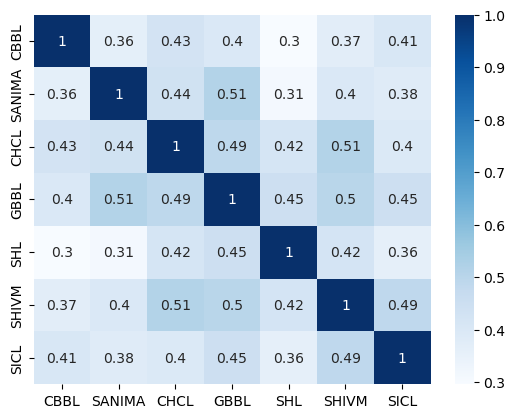

In [23]:
# correlation plot of the returns 
sns.heatmap(df.pct_change().corr(), cmap='Blues', annot=True )
plt.show()

OrderedDict({'CBBL': 0.0, 'SANIMA': 0.0, 'CHCL': 0.0, 'GBBL': 0.5, 'SHL': 0.5, 'SHIVM': 0.0, 'SICL': 0.0})
Expected annual return: 21.6%
Annual volatility: 32.6%
Sharpe Ratio: 0.57


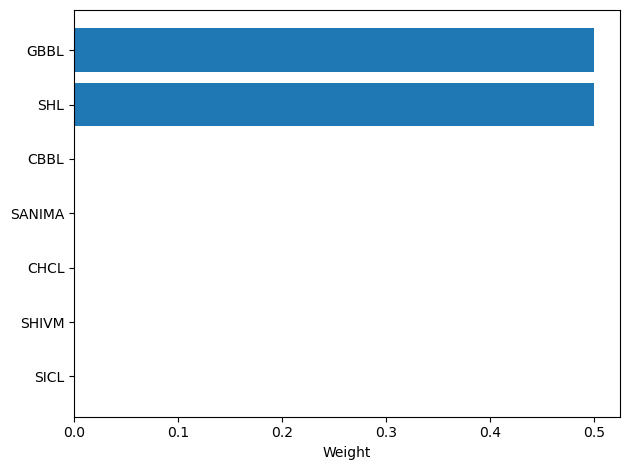

In [24]:
# maxium Sharpe portfolio
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.max_sharpe(risk_free_rate = 0.03)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

OrderedDict({'CBBL': 0.26873, 'SANIMA': 0.35055, 'CHCL': 0.14219, 'GBBL': 0.0, 'SHL': 0.13795, 'SHIVM': 0.0, 'SICL': 0.10056})
Expected annual return: 3.6%
Annual volatility: 23.9%
Sharpe Ratio: 0.03


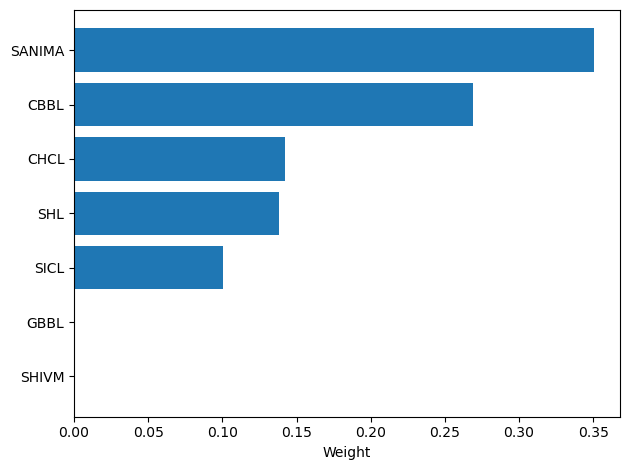

In [25]:
# minium volatility portfolio
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

OrderedDict({'CBBL': 0.15606, 'SANIMA': 0.21855, 'CHCL': 0.14896, 'GBBL': 0.13288, 'SHL': 0.34354, 'SHIVM': 0.0, 'SICL': 0.0})
Expected annual return: 12.0%
Annual volatility: 25.8%
Sharpe Ratio: 0.35


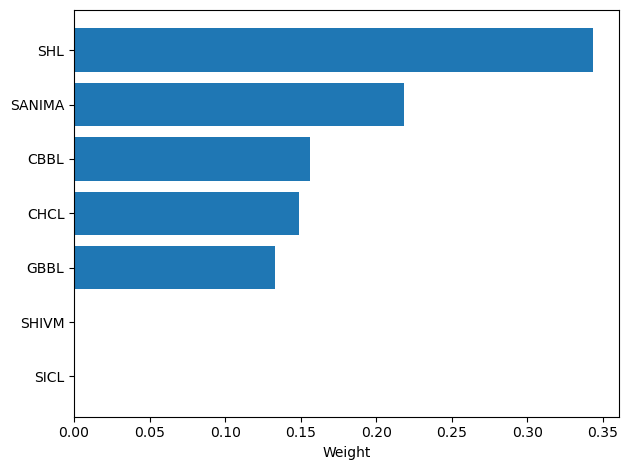

In [26]:
# get a return of 12%
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.efficient_return(0.12)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

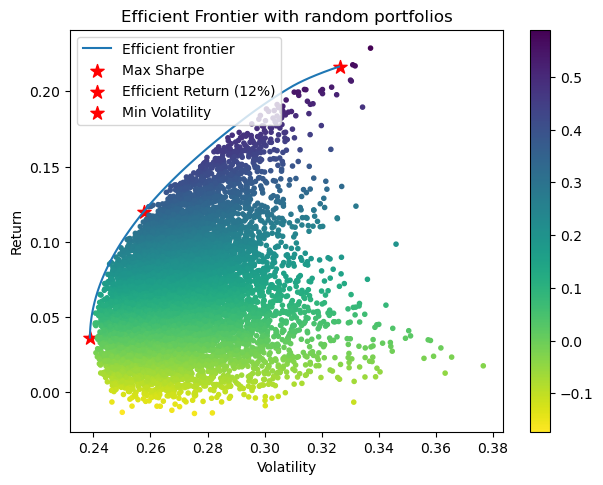

In [27]:
# obtain efficient frontier
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))

# plotting
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
ef_min_volatility = ef.deepcopy()
ef_return = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe(risk_free_rate = 0.03)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# return of 12% 
ef_return.efficient_return(0.12)
return_efficient_return, std_efficient_return, _ = ef_return.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_efficient_return, return_efficient_return, marker="*", s=100, c="r", label="Efficient Return (12%)")

# minium volatility
ef_min_volatility.min_volatility()
return_min_volatility, std_min_volatility, _ = ef_min_volatility.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_min_volatility, return_min_volatility, marker="*", s=100, c="r", label="Min Volatility")


# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = (rets - 0.03) / stds
pft = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
fig.colorbar(pft, orientation='vertical')

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

Using observations from more recent data to weigh more heavily in your decision so using Exponentially weighted mean and covariance martix

In [29]:
mu = expected_returns.ema_historical_return(df, span=365, frequency=252)
mu

CBBL     -0.110979
SANIMA    0.072435
CHCL     -0.052878
GBBL     -0.040428
SHL       0.135003
SHIVM    -0.039629
SICL     -0.033327
Name: 2025-03-25 00:00:00, dtype: float64

In [30]:
# exponentially weighted covariance matrix 
# 180 days data given more weight than old data
Sigma = risk_models.exp_cov(df, span=180, frequency=252)
Sigma

,CBBL,SANIMA,CHCL,GBBL,SHL,SHIVM,SICL
CBBL,0.056289,0.032755,0.043206,0.034558,0.031784,0.032004,0.027423
SANIMA,0.032755,0.066042,0.037161,0.039583,0.033375,0.040265,0.031971
CHCL,0.043206,0.037161,0.086009,0.039572,0.046098,0.047165,0.034914
GBBL,0.034558,0.039583,0.039572,0.063395,0.040885,0.042824,0.042721
SHL,0.031784,0.033375,0.046098,0.040885,0.098262,0.053942,0.042836
SHIVM,0.032004,0.040265,0.047165,0.042824,0.053942,0.117075,0.045849
SICL,0.027423,0.031971,0.034914,0.042721,0.042836,0.045849,0.090506


OrderedDict({'CBBL': 0.0, 'SANIMA': 0.5, 'CHCL': 0.0, 'GBBL': 0.0, 'SHL': 0.5, 'SHIVM': 0.0, 'SICL': 0.0})
Expected annual return: 10.4%
Annual volatility: 24.0%
Sharpe Ratio: 0.31


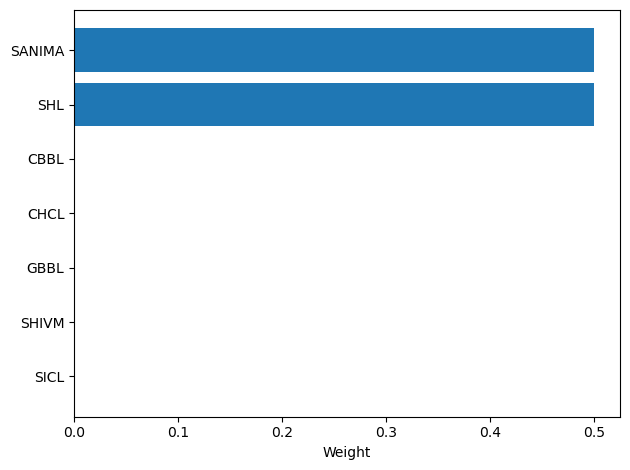

In [31]:
# maxium Sharpe portfolio
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.max_sharpe(risk_free_rate = 0.03)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

OrderedDict({'CBBL': 0.38162, 'SANIMA': 0.2247, 'CHCL': 0.01718, 'GBBL': 0.12492, 'SHL': 0.08509, 'SHIVM': 0.0229, 'SICL': 0.14358})
Expected annual return: -2.6%
Annual volatility: 20.3%
Sharpe Ratio: -0.28


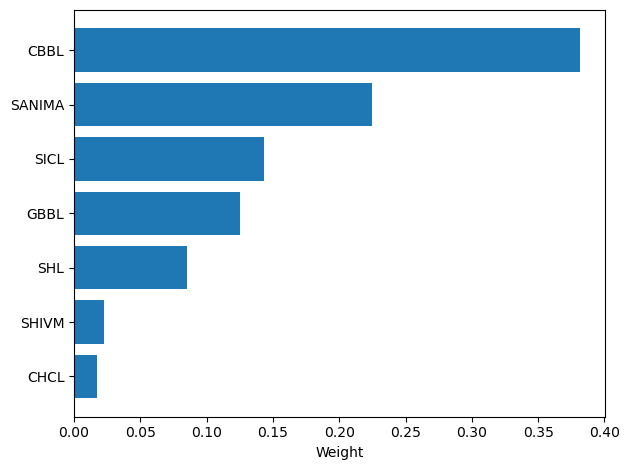

In [32]:
# minium volatility portfolio
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

OrderedDict({'CBBL': 0.0, 'SANIMA': 0.5, 'CHCL': 0.0, 'GBBL': 0.0, 'SHL': 0.47791, 'SHIVM': 0.0, 'SICL': 0.02209})
Expected annual return: 10.0%
Annual volatility: 23.8%
Sharpe Ratio: 0.29


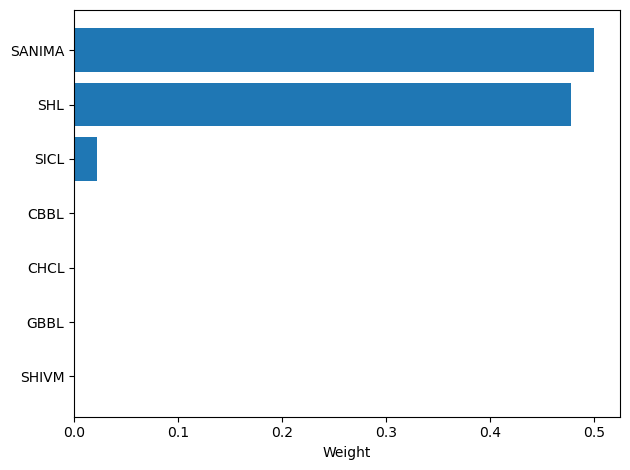

In [33]:
# get a return of 10%
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.efficient_return(0.10)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

The annual volitality is the standard deviation of the returns as such the returns are expected to ±23.8% for a given year 1SD.

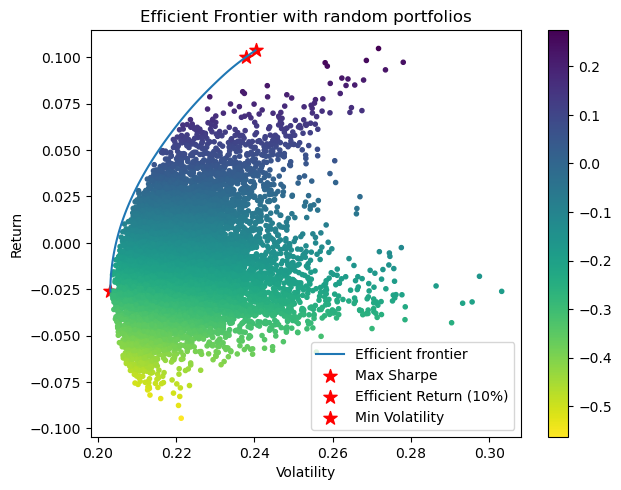

In [35]:
# obtain efficient frontier
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))

# plotting
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
ef_min_volatility = ef.deepcopy()
ef_return = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe(risk_free_rate = 0.03)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

#return of 10% 
ef_return.efficient_return(0.10)
return_efficient_return, std_efficient_return, _ = ef_return.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_efficient_return, return_efficient_return, marker="*", s=100, c="r", label="Efficient Return (10%)")

# minium volatility
ef_min_volatility.min_volatility()
return_min_volatility, std_min_volatility, _ = ef_min_volatility.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_min_volatility, return_min_volatility, marker="*", s=100, c="r", label="Min Volatility")


# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = (rets - 0.03) / stds
pft = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
fig.colorbar(pft, orientation='vertical')

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()

Portfolio optimization using only downside risk

In [37]:
# using only downside risk
Sigma = risk_models.semicovariance(df, benchmark=0, frequency=252)
Sigma

,CBBL,SANIMA,CHCL,GBBL,SHL,SHIVM,SICL
CBBL,0.053077,0.019072,0.024527,0.025716,0.023834,0.029038,0.025346
SANIMA,0.019072,0.042179,0.022109,0.025233,0.021525,0.028229,0.022098
CHCL,0.024527,0.022109,0.045910,0.029856,0.027616,0.034942,0.025918
GBBL,0.025716,0.025233,0.029856,0.057707,0.031575,0.037717,0.030755
SHL,0.023834,0.021525,0.027616,0.031575,0.052843,0.036321,0.027233
SHIVM,0.029038,0.028229,0.034942,0.037717,0.036321,0.066266,0.033482
SICL,0.025346,0.022098,0.025918,0.030755,0.027233,0.033482,0.069506


In [38]:
# returns of 252 days given more weight 
mu = expected_returns.ema_historical_return(df, span=365, frequency=252)
mu

CBBL     -0.110979
SANIMA    0.072435
CHCL     -0.052878
GBBL     -0.040428
SHL       0.135003
SHIVM    -0.039629
SICL     -0.033327
Name: 2025-03-25 00:00:00, dtype: float64

OrderedDict({'CBBL': 0.0, 'SANIMA': 0.5, 'CHCL': 0.0, 'GBBL': 0.0, 'SHL': 0.5, 'SHIVM': 0.0, 'SICL': 0.0})
Expected annual return: 10.4%
Annual volatility: 18.6%
Sharpe Ratio: 0.40


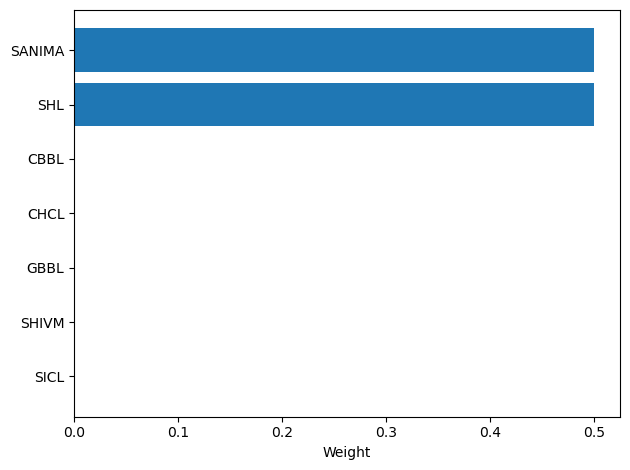

In [39]:
# maxium Sharpe portfolio
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.max_sharpe(risk_free_rate = 0.03)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

OrderedDict({'CBBL': 0.20462, 'SANIMA': 0.34804, 'CHCL': 0.19057, 'GBBL': 0.02672, 'SHL': 0.14566, 'SHIVM': 0.0, 'SICL': 0.08439})
Expected annual return: 0.8%
Annual volatility: 16.9%
Sharpe Ratio: -0.13


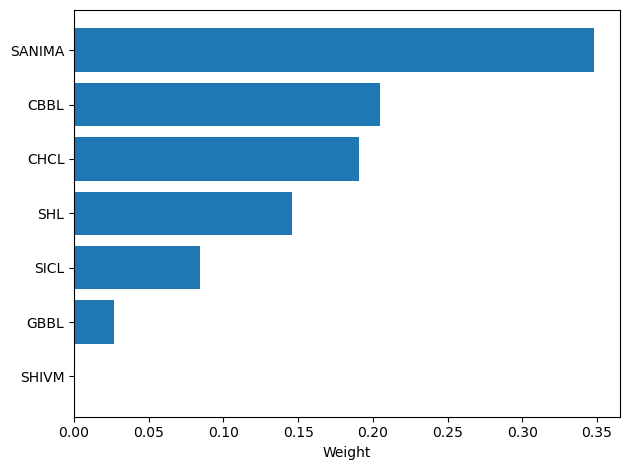

In [40]:
# minium volatility portfolio
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

OrderedDict({'CBBL': 0.0, 'SANIMA': 0.5, 'CHCL': 0.0, 'GBBL': 0.0, 'SHL': 0.47791, 'SHIVM': 0.0, 'SICL': 0.02209})
Expected annual return: 10.0%
Annual volatility: 18.4%
Sharpe Ratio: 0.38


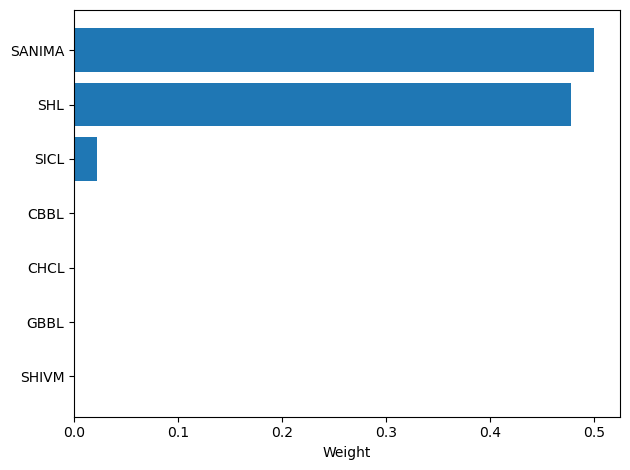

In [41]:
# get a return of 10%
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))
raw_weights = ef.efficient_return(0.10)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate = 0.03)
plotting.plot_weights(cleaned_weights)
plt.show()

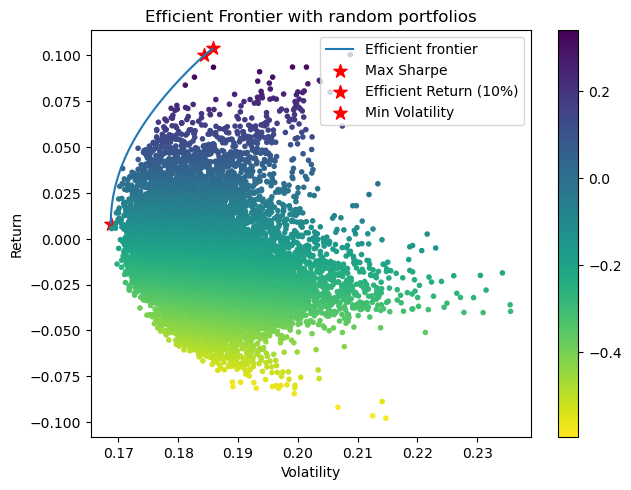

In [42]:
# obtain efficient frontier
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,0.5))

# plotting
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
ef_min_volatility = ef.deepcopy()
ef_return = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe(risk_free_rate = 0.03)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

#return of 10% 
ef_return.efficient_return(0.10)
return_efficient_return, std_efficient_return, _ = ef_return.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_efficient_return, return_efficient_return, marker="*", s=100, c="r", label="Efficient Return (10%)")

# minium volatility
ef_min_volatility.min_volatility()
return_min_volatility, std_min_volatility, _ = ef_min_volatility.portfolio_performance(risk_free_rate = 0.03)
ax.scatter(std_min_volatility, return_min_volatility, marker="*", s=100, c="r", label="Min Volatility")


# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = (rets - 0.03) / stds
pft = ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
fig.colorbar(pft, orientation='vertical')

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.show()